In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import librosa

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam

In [31]:
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

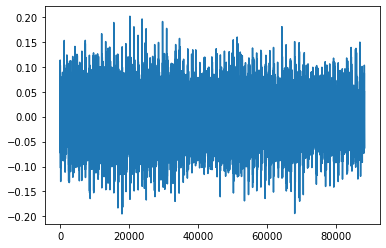

In [32]:
# Test
audio_file_path = "/content/drive/MyDrive/Koç Holding Bootcamp/UrbanSound8K/audio/fold1/103074-7-4-2.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)
plt.plot(librosa_audio_data)

In [33]:
data = pd.read_csv("/content/drive/MyDrive/Koç Holding Bootcamp/UrbanSound8K/metadata/UrbanSound8K.csv")
print(len(data["class"].unique()))
print(data["class"].unique())

10
['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


In [34]:
def create_spectogram(y):
  spec = librosa.feature.melspectrogram(y = librosa_audio_data)
  spec_conv = librosa.amplitude_to_db(spec, ref = np.max)
  return spec_conv

In [35]:
spec_conv = create_spectogram(librosa_audio_data)
spec_conv

array([[ -6.0274734,  -7.6164627, -10.175403 , ..., -13.455183 ,
        -16.590088 , -13.104269 ],
       [ -9.261299 , -11.107996 ,  -8.966644 , ..., -13.849125 ,
        -19.012749 , -16.282597 ],
       [-24.703148 , -19.07549  , -23.33644  , ..., -28.235943 ,
        -33.769653 , -35.24791  ],
       ...,
       [-80.       , -80.       , -80.       , ..., -80.       ,
        -80.       , -80.       ],
       [-80.       , -80.       , -80.       , ..., -80.       ,
        -80.       , -80.       ],
       [-80.       , -80.       , -80.       , ..., -80.       ,
        -80.       , -80.       ]], dtype=float32)

In [ ]:
# pip install librosa==0.9.2

In [36]:
from librosa.display import specshow
def plot_spectogram(spectogram):
  plt.figure(figsize =(10,10))
  specshow(data = spec_conv)
  plt.colorbar(format = "%+2.f")

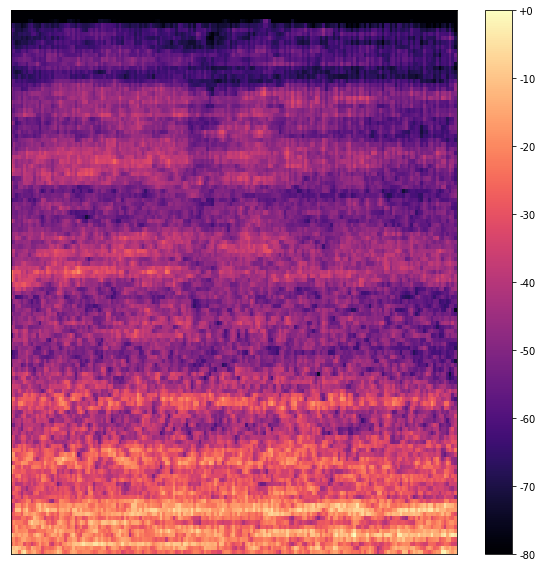

In [37]:
plot_spectogram(spec_conv)

In [38]:
from glob import glob
files = glob("/content/drive/MyDrive/Koç Holding Bootcamp/UrbanSound8K/audio/*/*.wav")

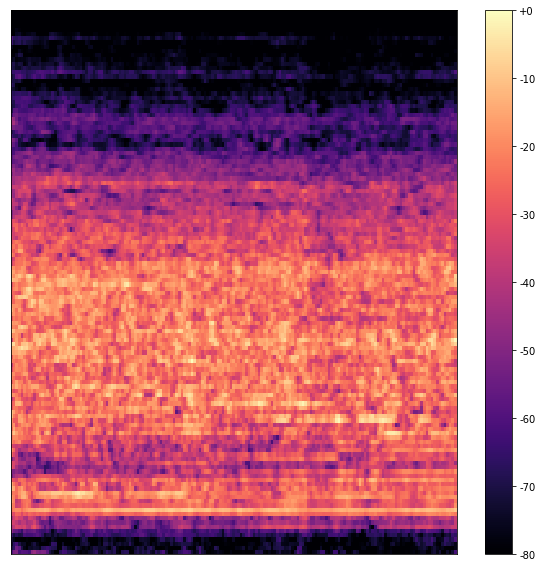

In [39]:
for file in files:
  file_name = file.split("/")[-1]
  temp = data.loc[data["slice_file_name"] == file_name]
  class_value = temp["class"].values[0]
  librosa_audio_data, librosa_sample_rate = librosa.load(file)
  spec_conv = create_spectogram(librosa_audio_data)
  plot_spectogram(spec_conv)
  break

In [ ]:
#CNN